In [0]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
import random
from collections import defaultdict,Counter

In [0]:
df2011raw = pd.read_csv('E:\Github\MLN\FinalData/2011raw.csv')
dfgraph = pd.read_csv('E:\Github\MLN\FinalData/GraphProp.csv')
dfcensus = pd.read_csv('E:\Github\MLN\FinalData/census.csv')

In [0]:
df2011raw.columns

Index(['Area Name', 'Last residence', 'Total migrants Persons',
       'Total migrants Males', 'Total migrantsFemales',
       'Work/employment Persons', 'Work/employment Males',
       'Work/employment Females', 'Business Persons', 'Business Males',
       ...
       'Unnamed: 16368', 'Unnamed: 16369', 'Unnamed: 16370', 'Unnamed: 16371',
       'Unnamed: 16372', 'Unnamed: 16373', 'Unnamed: 16374', 'Unnamed: 16375',
       'Unnamed: 16376', 'Unnamed: 16377'],
      dtype='object', length=16378)

In [0]:
top5 = df2011raw.groupby('Area Name')['Education Persons'].apply(lambda grp: grp.nlargest(10)).index
top5data = []
for i in top5:
    top5data.append([df2011raw['Last residence'].loc[i[1]], i[0], df2011raw['Education Persons'].loc[i[1]]])
t = pd.DataFrame(top5data, columns=['Source', 'Target','Weight'])

In [0]:
t.Source = t.Source.apply(lambda x: x+'_out')
t.Target = t.Target.apply(lambda x: x+'_in')

In [0]:
allstates = list(set(t['Source'].unique().tolist()) | set(t['Target'].unique().tolist()))

In [0]:
le = LabelEncoder()
le.fit(allstates)

LabelEncoder()

In [0]:
t['Source'] = le.transform(t['Source'])
t['Target'] = le.transform(t['Target'])

In [0]:
a = t['Source']
b = t['Target']
g = nx.Graph()

In [0]:
wdict = defaultdict(int)
lp2011=[]
for i,j,k in zip(a, b, t['Weight'].tolist()):
    if i!=j:
        lp2011.append((i,j,k))
    

In [0]:
g.add_weighted_edges_from(lp2011)
orgadj = nx.to_numpy_matrix(g)
random.shuffle(lp2011)
train = lp2011[:int(len(lp2011) *0.9)]
test = lp2011[int(len(lp2011) *0.9):]

In [0]:
g1 = nx.Graph()
g1.add_weighted_edges_from(train)

In [0]:
nodes = list(g1.nodes())

In [0]:
def nonconnectednodes(G):
    n = G.nodes()
    un = set()
    for i in n:
        for j in n:
            x = (i,j)
            if i!=j and not G.has_edge(*x) and x not in un:
                un.add(x)
    return list(un)

In [0]:
def commonNeighbours(un, G):
    un_cn = {}
    for i in un:
        un_cn[i] = list(set(G[i[0]]).intersection(set(G[i[1]])))
    return un_cn

## Weighted Similarity Indices Based on Local Information

In [0]:
def measure(g, a=1):
    
    swcn = {}
    swaa = {}
    swra = {}
    for i in un:
        swcn[i] = 0
        swaa[i] = 0
        swra[i] = 0

        for j in uncn[i]:
            try:
                x = g[i[0]][j]['weight'] ** a
            except:
                x = 1
            try:
                y = g[j][i[0]]['weight'] ** a
            except:
                y = 1
            swcn[i]+= (x + y) 
            swaa[i]+= ((x+y)/(np.log10(1+ sum([g[j][k]['weight']for k in g[j]]))))
            swra[i]+= ((x+y)/(sum([g[j][k] ['weight'] for k in g[j]])))
    return swcn, swaa, swra

## Weighted Mutual Information Model

In [0]:
# connected pairs
def getcondiscomp(g):
    nodes = list(g.nodes())
    con = defaultdict(int)
    dcon = defaultdict(int)
    for i in range(len(nodes)):
        for j in range(i, len(nodes)):
            common = list(set(g[i]).intersection(set(g[j])))
            for k in nodes:
                if k in common:
                    con[k]+=1
                else:
                    dcon[k]+=1
    return con, dcon

In [0]:
def measuremi(g, a=1):
    
    swcn = {}
    swaa = {}
    swra = {}
    for i in un:
        swcn[i] = 0
        swaa[i] = 0
        swra[i] = 0
        for j in uncn[i]:
            try:
                x = g[i[0]][j]['weight'] ** a
            except:
                x = 1
            try:
                y = g[j][i[0]]['weight'] ** a
            except:
                y = 1
            swcn[i]+= (x + y) * (-1 * np.log10(mt/m) + np.log10(con[j]/(con[j]+dcon[j])))
            swaa[i]+= ((x+y)/(np.log10(1+ sum([g[j][k] ['weight']for k in g[j]]))))* (-1 * np.log10(mt/m) + np.log10(con[j]/(con[j]+dcon[j])))
            swra[i]+= ((x+y)/(sum([g[j][k] ['weight'] for k in g[j]])))* (-1 * np.log10(mt/m) + np.log10(con[j]/(con[j]+dcon[j])))
            
    return swcn, swaa, swra

In [0]:
def getTrueLabels(un, G):
    y_true= []
    for i in un:
        if G.has_edge(*i):
            y_true.append(1)
        else:
            y_true.append(0)
    return y_true

In [0]:
nodes = list(g1.nodes())
mt = len(g1.edges())
m  = len(nodes)*(len(nodes)-1)/2
con, dcon = getcondiscomp(g1)

In [0]:
un   = nonconnectednodes(g1)
uncn = commonNeighbours(un, g1)
swcn, swaa, swra = measure(g1, a=1)
swcn2, swaa2, swra2 = measuremi(g1, a=1)
y_true = getTrueLabels(un, g)

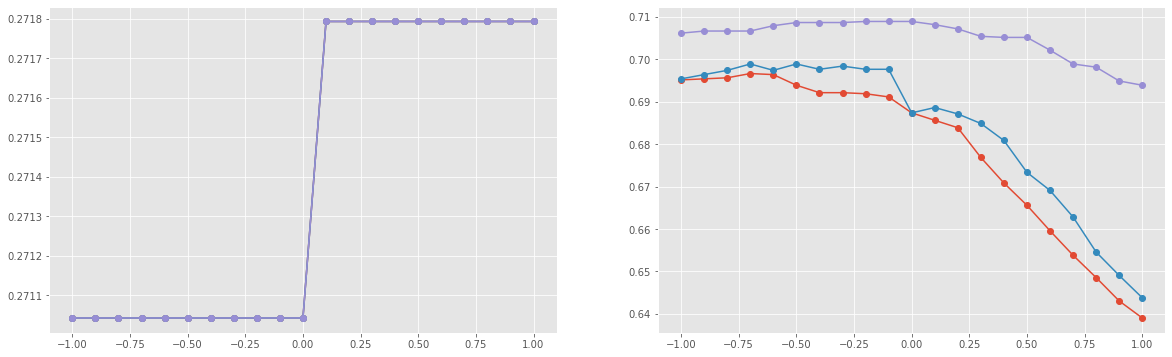

In [0]:
avalue = [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. , 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]
scores = [[],[],[],[],[],[]]
for i in avalue:
#     print("#####################################################")
#     print("\t\t\t a = {} ".format(i))
    swcn, swaa, swra = measure(g1, a=i)
    swcn2, swaa2, swra2 = measuremi(g1, a=i)
#     drawgraph(swcn, swaa, swra, swcn2, swaa2, swra2)
    scores[0].append(roc_auc_score(y_true, list(swcn.values())))
    scores[1].append(roc_auc_score(y_true, list(swaa.values())))
    scores[2].append(roc_auc_score(y_true, list(swra.values())))
    scores[3].append(roc_auc_score(y_true, list(swcn2.values())))
    scores[4].append(roc_auc_score(y_true, list(swaa2.values())))
    scores[5].append(roc_auc_score(y_true, list(swra2.values())))
#     print("#####################################################")
plt.figure(figsize=(20, 6))
plt.subplot(121)
for i in scores[:3]:
    plt.plot(avalue, i,'-o')

plt.subplot(122)
for i in scores[3:]:
    plt.plot(avalue, i,'-o')
plt.show()

In [0]:
plt.figure(figsize=(10, 6))
for i in scores[3:]:
    plt.plot(avalue, i,'-o')
plt.title('Education Persons')
plt.xlabel('a values')
plt.ylabel('AUC Score')
plt.legend(['WMI-WCN','WMI-WAA','WMI-WRA'],loc='lower left',fancybox=True, shadow=True)
plt.show()

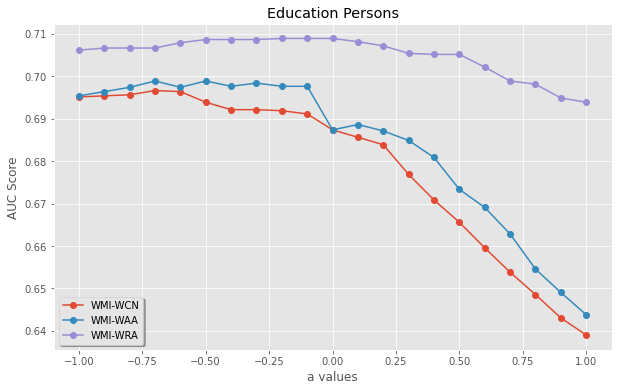

In [0]:
# plt.figure(figsize=(10, 6))
# for i in scores[3:]:
#     plt.plot(avalue, i,'-o')
# plt.title('Education Persons')
# plt.xlabel('a values')
# plt.ylabel('AUC Score')
# plt.legend(['WMI-WCN','WMI-WAA','WMI-WRA'],loc='lower left',fancybox=True, shadow=True)
# plt.show()

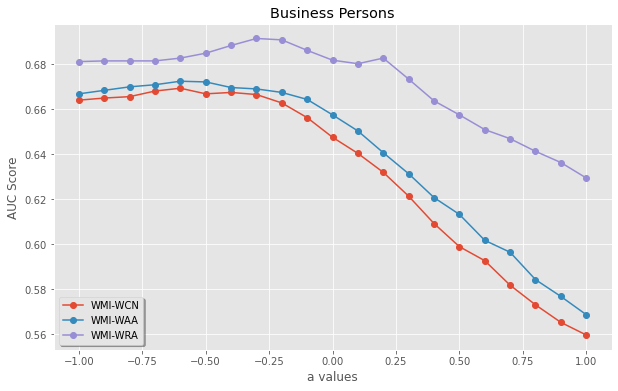

In [0]:
# plt.figure(figsize=(10, 6))
# for i in scores[3:]:
#     plt.plot(avalue, i,'-o')
# plt.title('Business Persons')
# plt.xlabel('a values')
# plt.ylabel('AUC Score')
# plt.legend(['WMI-WCN','WMI-WAA','WMI-WRA'],loc='lower left',fancybox=True, shadow=True)
# plt.show()

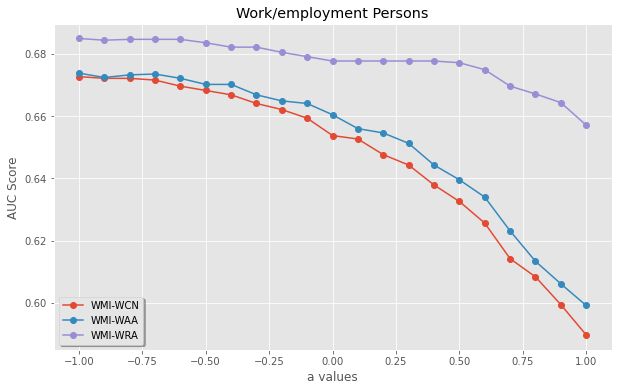

In [0]:
# plt.figure(figsize=(10, 6))
# for i in scores[3:]:
#     plt.plot(avalue, i,'-o')
# plt.title('Work/employment Persons')
# plt.xlabel('a values')
# plt.ylabel('AUC Score')
# plt.legend(['WMI-WCN','WMI-WAA','WMI-WRA'],loc='lower left',fancybox=True, shadow=True)
# plt.show()

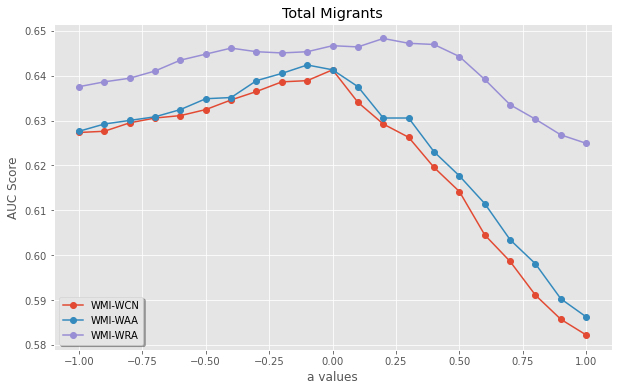

In [0]:
# plt.figure(figsize=(10, 6))
# for i in scores[3:]:
#     plt.plot(avalue, i,'-o')
# plt.title('Total Migrants')
# plt.xlabel('a values')
# plt.ylabel('AUC Score')
# plt.legend(['WMI-WCN','WMI-WAA','WMI-WRA'],loc='lower left',fancybox=True, shadow=True)
# plt.show()

In [0]:
# fpr, tpr, thresholds = roc_curve(y_true, list(un_jc.values()))
def drawgraph(swcn, swaa, swra, swcn2, swaa2, swra2):
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    lw=2
    fpr, tpr, thresholds = roc_curve(y_true, list(swcn.values()))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=lw, label=f'Common Neighbour (Area = %0.3f)' % roc_auc)

    fpr, tpr, thresholds = roc_curve(y_true, list(swaa.values()))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=lw, label=f'Adamic-Adar (Area = %0.3f)' % roc_auc)  
    # (area = %0.2f)')roc_auc[2])
    fpr, tpr, thresholds = roc_curve(y_true, list(swra.values()))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=lw, label=f'Resource allocator (Area = %0.3f)' % roc_auc)


    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic of 75% Graph')
    plt.legend(loc="lower right")
    plt.subplot(122)
    # fpr, tpr, thresholds = roc_curve(y_true, list(un_jc.values()))
    lw=2
    fpr, tpr, thresholds = roc_curve(y_true, list(swcn2.values()))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=lw, label=f'Common Neighbour (Area = %0.3f)' % roc_auc)

    fpr, tpr, thresholds = roc_curve(y_true, list(swaa2.values()))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=lw, label=f'Adamic-Adar (Area = %0.3f)' % roc_auc)  
    # (area = %0.2f)')roc_auc[2])
    fpr, tpr, thresholds = roc_curve(y_true, list(swra2.values()))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,lw=lw, label=f'Resource allocator (Area = %0.3f)' % roc_auc)


    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic of 75% Graph')
    plt.legend(loc="lower right")
    plt.show()